In [14]:
# %matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import pymc as pm

print("pymc:", pm.__version__)

pymc: 5.0.1


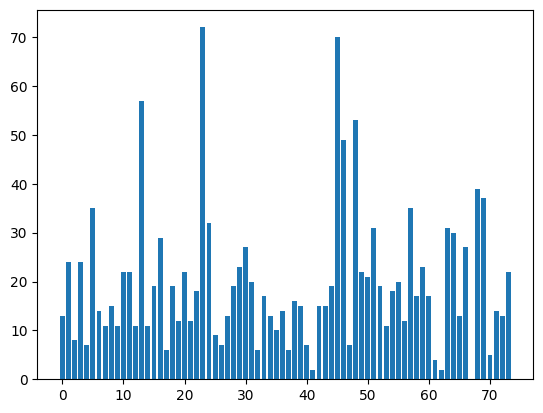

In [15]:
count_data = np.loadtxt("txtdata.csv")
n_count_data = len(count_data)
_ = plt.bar(np.arange(n_count_data), count_data)

In [22]:
alpha = 1.0 / count_data.mean()

# https://saintyui.tistory.com/entry/%ED%99%95%EB%A5%A0-%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D-API-PyMC-PyMC3-%EB%8B%AC%EB%9D%BC%EC%A7%84-%EB%AC%B8%EB%B2%95
with pm.Model() as model:
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data)

print("lambda_1:", pm.draw(lambda_1), type(lambda_1))
print("lambda_2:", pm.draw(lambda_2), type(lambda_2))
print("tau:", pm.draw(tau), type(tau))

lambda_1: 9.358875570836569 <class 'pytensor.tensor.var.TensorVariable'>
lambda_2: 16.262163240615724 <class 'pytensor.tensor.var.TensorVariable'>
tau: 28 <class 'pytensor.tensor.var.TensorVariable'>


In [24]:
@pm.Deterministic
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
    out = np.zeros(n_count_data)
    out[:tau] = lambda_1  # lambda before tau is lambda1
    out[tau:] = lambda_2  # lambda after (and including) tau is lambda2
    return out

TypeError: Deterministic() missing 1 required positional argument: 'var'